Tamanna A <br>
Uni: ta2642


In [404]:
import glob
import numpy as np
import pandas as pd
import parselmouth 
import statistics
from praatio import textgrid
import math
from parselmouth.praat import call
import matplotlib.pyplot as plt

### file format

--- speaker_session_emotion_start-time_content.wav <br/>
---        gg_001_  shame_1998.89_July-eighteenth.wav <br/>
--- 7 speakers (cc, cl, gg, jg, mf, mk, mm) <br/>
--- labeled with 15 emotions <br/>
    (anxiety, boredom, cold-anger, contempt, despair, disgust, elation, happy, hot-anger, interest, neutral, panic, pride, sadness, shame)

In [386]:
speakers = ['cc', 'cl', 'gg', 'jg', 'mf', 'mk', 'mm']
emotions = ['anxiety', 'boredom', 'cold-anger', 'contempt', 'despair', 'disgust', 'elation',
            'happy', 'hot-anger', 'interest', 'neutral', 'panic', 'pride', 'sadness', 'shame']

In [387]:
speakers_size = {}
for speaker in speakers:
    path = "hw3_speech_files/*{input}".format(input= speaker)
    files = glob.glob(path+"*.wav")
    speakers_size[speaker] = len(files)

In [388]:
speakers_size

{'cc': 265, 'cl': 368, 'gg': 420, 'jg': 273, 'mf': 299, 'mk': 397, 'mm': 302}

In [48]:
emotions_size = {}
for emotion in emotions:
    path = "hw3_speech_files/*{input}".format(input= emotion)
    files = glob.glob(path+"*.wav")
    emotions_size[emotion] = len(files)

In [49]:
emotions_size

{'anxiety': 170,
 'boredom': 154,
 'cold-anger': 154,
 'contempt': 180,
 'despair': 174,
 'disgust': 172,
 'elation': 159,
 'happy': 177,
 'hot-anger': 139,
 'interest': 176,
 'neutral': 79,
 'panic': 141,
 'pride': 150,
 'sadness': 151,
 'shame': 148}

In [3]:
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID)  # read the sound
    duration = call(sound, "Get total duration")  # duration
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max)  # create a praat pitch object
    mean_pitch = call(pitch, "Get mean", 0, 0, unit)  # get mean pitch
    min_pitch = call(pitch, "Get minimum", 0, 0, "Hertz", "parabolic")
    max_pitch = call(pitch, "Get maximum", 0, 0, "Hertz", "parabolic")
    stdev_pitch = call(pitch, "Get standard deviation", 0, 0, unit)  # get standard deviation
    intensity = call(sound, "To Intensity",100, 0, "yes")
    mean_int = call(intensity, 'Get mean', 0, 0, "energy")
    stdev_int = call(intensity, 'Get standard deviation', 0, 0)
    min_int = call(intensity, "Get minimum", 0, 0,  "parabolic")
    max_int = call(intensity, "Get maximum", 0, 0,  "parabolic")
    
    return min_pitch, max_pitch, mean_pitch, stdev_pitch, min_int, max_int, mean_int,\
           stdev_int, duration

In [4]:
cols = ['file_name', 'speaker', 'session', 'emotion','start_time', 'content', 
        'min_pitch','max_pitch', 'mean_pitch', 'stdev_pitch', 
        'min_int', 'max_int', 'mean_int','stdev_int', 'duration']

In [100]:
#read through each file & extract praat features- pitch & intensity
speech_file = []
for wave_file in glob.glob("hw3_speech_files/*.wav"):
    parts = wave_file.split("/")[1].split("_")
    speaker, session, emotion,start_time, content = parts
    #speech_file.append([wave_file, speaker, session, emotion,start_time, content])
    
    
    sound = parselmouth.Sound(wave_file)
    (min_pitch, max_pitch, mean_pitch, stdev_pitch, min_int, max_int, mean_int,
    stdev_int, duration) = measurePitch(sound, 75, 600, "Hertz")
    
    speech_file.append([wave_file, speaker, session, emotion,start_time, content,
               min_pitch, max_pitch, mean_pitch, stdev_pitch, 
                min_int, max_int, mean_int,
                stdev_int, duration])
    #print(speech_file)
    if(len(speech_file)%100 == 0): 
        print("-")
    
print(len(speech_file))

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
2324


In [101]:
#convert to dataframe 
df = pd.DataFrame(speech_file, columns= cols)

In [113]:
df.to_csv("speech_file.csv", index=False)

In [433]:
df = pd.read_csv("speech_file.csv")

In [426]:
df.shape

(2324, 15)

In [439]:
df.head()

,file_name,speaker,session,emotion,start_time,content,min_pitch,max_pitch,mean_pitch,stdev_pitch,min_int,max_int,mean_int,stdev_int,duration
0,hw3_speech_files/mf_001_interest_2590.84_Eight...,mf,1,interest,2590.84,Eight-hundred-two.wav,136.715830,396.699742,298.642767,78.437169,34.527183,68.962233,61.546226,9.669914,0.980045
1,hw3_speech_files/mf_001_anxiety_1171.28_Six-hu...,mf,1,anxiety,1171.28,Six-hundred-one.wav,146.854814,240.335429,164.339495,21.670631,43.172705,71.176645,65.984831,7.274682,0.930068
2,hw3_speech_files/cc_001_pride_2501.34_March-tw...,cc,1,pride,2501.34,March-twenty-fifth.wav,92.661032,563.976473,150.376392,115.939684,32.748692,70.481592,62.342660,10.535670,1.060045
3,hw3_speech_files/cc_001_boredom_2278.62_Six-hu...,cc,1,boredom,2278.62,Six-hundred-six.wav,88.371444,218.513929,128.143332,49.189179,30.972236,67.951672,61.125778,10.447063,1.490068
4,hw3_speech_files/jg_001_panic_443.70_Fifty-sev...,jg,1,panic,443.70,Fifty-seven.wav,146.097492,232.795872,177.215006,23.242049,27.717918,64.319924,53.859348,10.308829,1.300091


## z- score standard deviation

1. standard deviation of all pitch data (min, max, mean )
        
        ````
        speaker_A_feature = (speaker_A_feature - speaker_A_feature_mean)/speaker_A_feature_stdev)
        ````

In [448]:
all_normalized = []
df_normalized = pd.DataFrame()
for name in speakers:
    test_df = df[df["speaker"]== name]
    test_df = (test_df - test_df.mean())/test_df.std()
    test_df['speaker'] = name
    all_normalized.append(test_df)
    
df_normalized = pd.concat(all_normalized)

/var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/ipykernel_48493/4019950504.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df = (test_df - test_df.mean())/test_df.std()


In [455]:
df_normalized.head()

,duration,max_int,max_pitch,mean_int,mean_pitch,min_int,min_pitch,speaker,start_time,stdev_int,stdev_pitch,emotion,file_name,content
2,-0.148291,-0.928583,1.751061,-0.988946,-0.324479,0.053597,-0.395732,cc,1.055043,-0.381025,2.054869,pride,hw3_speech_files/cc_001_pride_2501.34_March-tw...,March-twenty-fifth.wav
3,0.115172,-1.375405,-0.507559,-1.215096,-0.640843,-0.285873,-0.504520,cc,0.794416,-0.434770,0.118113,boredom,hw3_speech_files/cc_001_boredom_2278.62_Six-hu...,Six-hundred-six.wav
31,-0.117644,-0.526627,-0.620651,-1.087183,-0.820747,0.405863,-0.607038,cc,1.122763,-1.644193,-0.282050,pride,hw3_speech_files/cc_001_pride_2559.21_Six-hund...,Six-hundred-five.wav
44,0.115144,-0.437835,-0.662376,-0.450112,-0.656590,0.667536,-0.571046,cc,0.935460,-0.386590,-0.603856,shame,hw3_speech_files/cc_001_shame_2399.15_Eight-th...,Eight-thousand-nine.wav
45,-0.056404,1.598493,-0.142242,1.452664,0.729602,0.551045,1.765625,cc,-0.244022,0.503696,-0.632013,cold-anger,hw3_speech_files/cc_001_cold-anger_1391.22_Dec...,December-eighth.wav


In [450]:
df_normalized = df_normalized.drop(columns = {'emotion', 'session', 'file_name', 'content'})

In [452]:
df_normalized= df_normalized.merge(df['emotion'], left_index=True, right_index=True)

In [453]:
df_normalized= df_normalized.merge(df['file_name'], left_index=True, right_index=True)

In [454]:
df_normalized= df_normalized.merge(df['content'], left_index=True, right_index=True)

In [521]:
def plot_part1(feature):
    fig, axs = plt.subplots(1,2, figsize = (15,5))
    fig.tight_layout()
    plt.subplots_adjust(wspace = 0.5)

    axs[0].errorbar(x = emotions, 
                    y = df.groupby('emotion')[feature].mean(),
                yerr = df.groupby('emotion')[feature].std(),
                 fmt = 'o',
                 elinewidth = 1, capsize=5, ecolor = "lightgreen")

    axs[0].tick_params(labelrotation=45)
    axs[0].set_title(f'{feature} without normalization')

    axs[1].errorbar(x = emotions, 
                    y = df_normalized.groupby('emotion')[feature].mean(),
                yerr = df_normalized.groupby('emotion')[feature].std(),
                 fmt = 'o',
                 elinewidth = 1, capsize=5, ecolor = "lightgreen")

    axs[1].tick_params(labelrotation=45)
    axs[1].set_title(f'{feature} with normalization')

    return axs

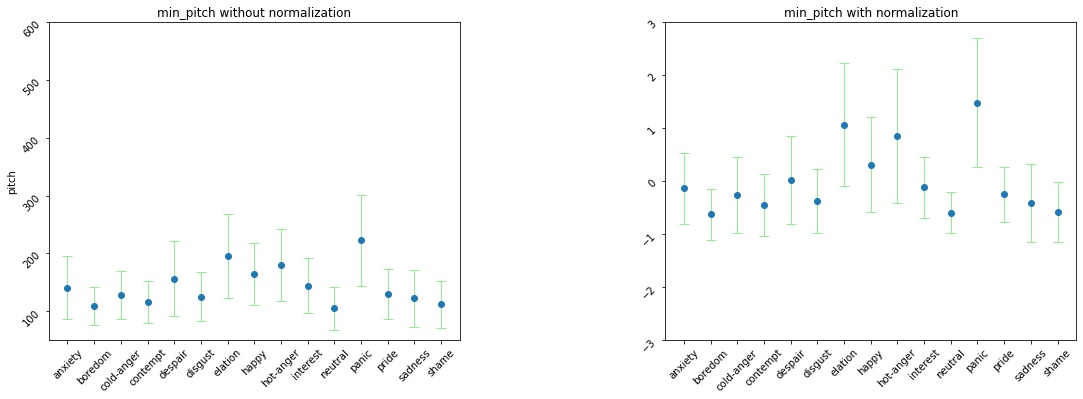

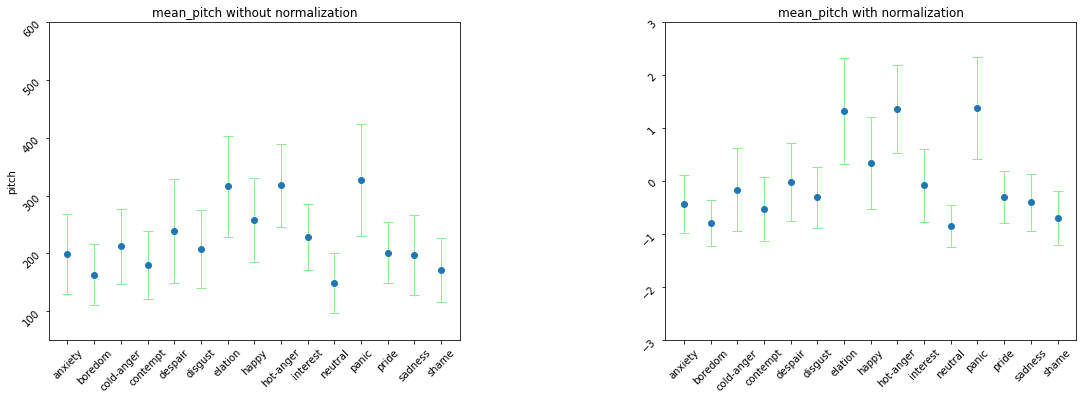

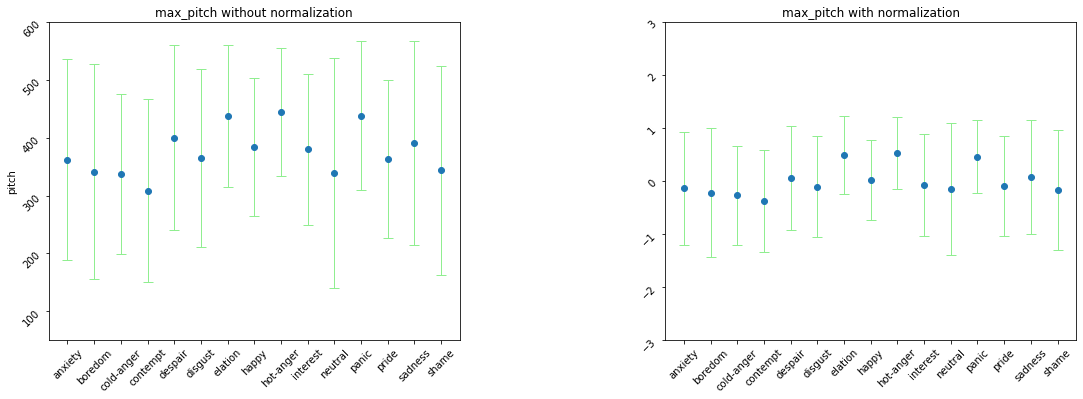

In [525]:
feature = [ 'min_pitch', 'mean_pitch', 'max_pitch']
for f in feature:
    axs = plot_part1(f)
    axs[0].set_ylim(ymin=50,ymax=600)
    axs[0].set_ylabel('pitch')
    axs[1].set_ylim(ymin = -3, ymax = 3)

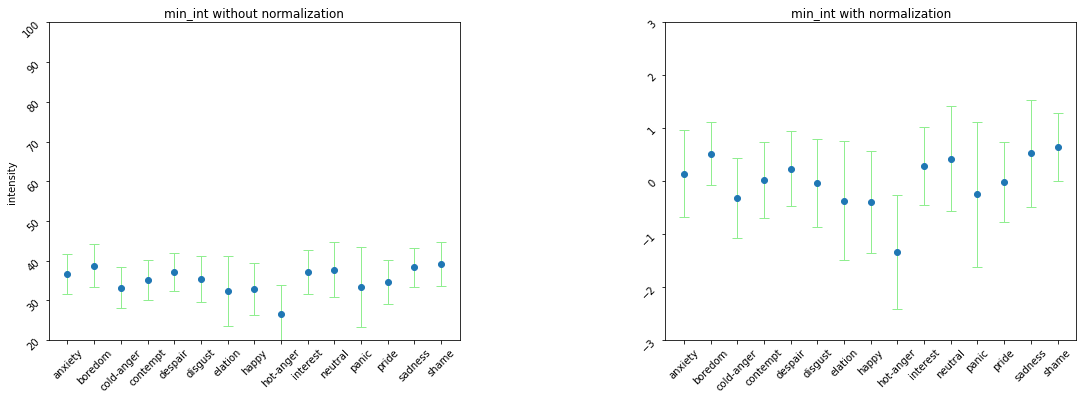

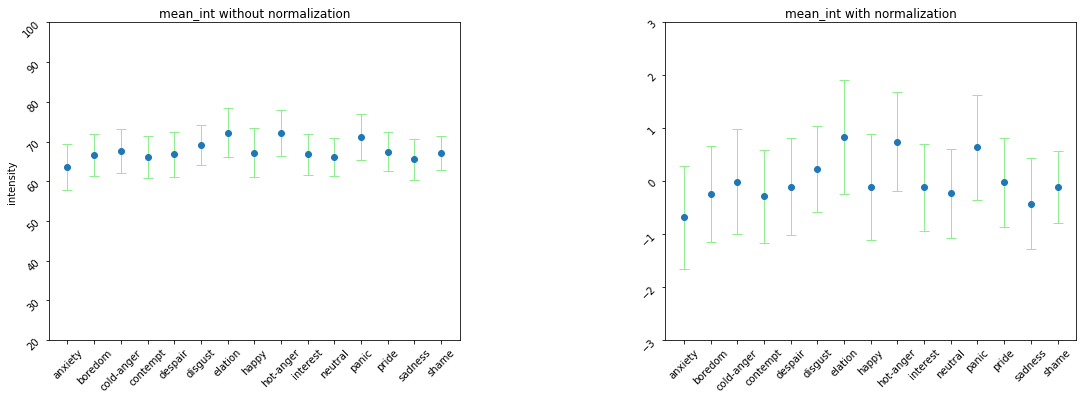

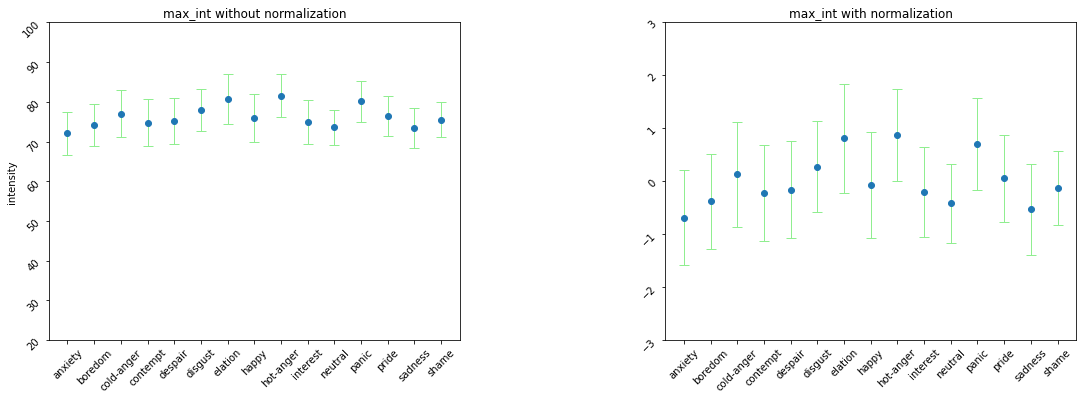

In [526]:
feature = [ 'min_int', 'mean_int', 'max_int']
for f in feature:
    axs = plot_part1(f)
    axs[0].set_ylabel('intensity')
    axs[0].set_ylim(ymin=20,ymax=100)
    axs[1].set_ylim(ymin = -3, ymax = 3)

### OpenSmile- Feature Extraction

#### Steps taken
1. Run the following bash script for each .wav file and get csv files for each
    - Using ISO9-emotion configuration
2. Get the column names from one of the csv files
3. Combine all of the csv files into one dataframe
4. Normalize features for each speaker
-- bash script <br/>
./build/progsrc/smilextract/SMILExtract -C config/is09-13/IS09_emotion.conf -I ../hw3_speech_files/*.wav -O ../files_smile.csv


#### 1. Run the following bash script for each .wav

In [10]:
import os

In [11]:
cmd_template = 'opensmile/build/progsrc/smilextract/SMILExtract -C opensmile/config/is09-13/IS09_emotion.conf -I {wave_file} -O speech_files_features/{output_file_name}.csv'

In [12]:
for wave_file in glob.glob("hw3_speech_files/*.wav"):
    file_name = wave_file.split("/")[1].split(".w")[0]
    cmd = cmd_template.format(wave_file = wave_file, output_file_name = file_name)
    os.system(cmd)
    #print(cmd)
    #print(file_name)

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 105 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 138 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 158 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 156 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 177 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 146 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 192 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 303 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 172 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 177 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 122 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 154 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 115 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 120 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] cComponentManager: Processing finished! System ran for 135 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 158 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 109 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 132 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 101 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 116 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 137 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 125 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 185 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 103 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 189 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 104 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 103 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 148 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 118 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 167 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 151 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 140 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 153 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 139 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 82 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 148 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 173 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 169 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 89 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 132 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 83 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 138 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 183 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 134 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 133 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 114 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 223 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 161 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 270 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 164 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 165 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 145 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 145 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 139 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 193 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 151 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 193 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 229 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 127 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 199 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] cComponentManager: Processing finished! System ran for 163 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 95 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 169 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 140 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 174 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 120 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 161 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 132 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 167 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 152 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 99 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 186 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': N

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 170 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 137 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 159 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 149 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 122 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 135 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 187 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 93 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] cComponentManager: Processing finished! System ran for 184 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 125 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 153 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 156 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 155 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 127 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 157 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 187 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 111 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 149 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 150 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 146 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 214 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 183 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 98 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 185 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 185 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 206 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 142 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 151 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 124 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 211 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 178 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 180 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 175 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 108 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] cComponentManager: Processing finished! System ran for 231 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 214 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 131 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 149 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 165 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 140 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 96 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 136 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 137 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 175 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] cComponentManager: Processing finished! System ran for 177 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 125 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 170 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 169 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 155 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 158 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 184 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 116 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 163 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 203 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 89 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 108 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 136 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 172 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 96 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 166 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] cComponentManager: Processing finished! System ran for 181 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 104 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 106 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 171 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 117 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 134 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] cComponentManager: Processing finished! System ran for 156 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 109 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 166 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 143 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 143 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 167 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 196 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 134 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 131 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 97 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] cComponentManager: Processing finished! System ran for 112 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 117 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 151 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 119 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffs

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 139 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 182 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 197 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 126 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 161 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 109 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 207 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 178 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 146 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 112 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 163 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] cComponentManager: Processing finished! System ran for 125 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 133 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 138 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 97 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 106 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 150 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink'

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 130 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 184 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 127 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 164 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 181 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 145 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 191 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 128 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 161 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 162 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 161 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 138 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 142 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 179 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 163 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 156 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 231 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink'

(MSG) [2] cComponentManager: Processing finished! System ran for 151 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 147 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 128 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 198 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 134 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 165 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 210 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 185 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 88 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 161 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No file

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 174 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 131 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] cComponentManager: Processing finished! System ran for 175 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 189 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 153 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] cComponentManager: Processing finished! System ran for 121 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 122 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 165 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 146 ticks.
(MSG) [2] SMILExtract: openSMILE st

(MSG) [2] cComponentManager: Processing finished! System ran for 176 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 79 ticks.
(MSG) [2] SMILExtract: openSMILE sta

(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 146 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 da

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 142 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 174 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 103 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink'

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 150 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09

(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 97 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_

(MSG) [2] cComponentManager: Processing finished! System ran for 154 ticks.
(MSG) [2] SMILExtract: openSMILE starting!
(MSG) [2] SMILExtract: config file is: opensmile/config/is09-13/IS09_emotion.conf
(MSG) [2] cComponentManager: successfully registered 102 component types.
(MSG) [2] instance 'lldsink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldhtksink': No filename given, disabling this sink component.
(MSG) [2] instance 'lldarffsink': No filename given, disabling this sink component.
(MSG) [2] instance 'csvsink': No filename given, disabling this sink component.
(MSG) [2] instance 'htksink': No filename given, disabling this sink component.
(MSG) [2] cComponentManager: successfully finished createInstances (25 component instances were finalised, 1 data memories were finalised)
(MSG) [2] cComponentManager: starting single thread processing loop
(MSG) [2] cComponentManager: Processing finished! System ran for 134 ticks.
(MSG) [2] SMILExtract: openSMILE st

#### 2. Get the column names from one of the csv files

- column names on lines 4 - 388
    - @attribute pcm_RMSenergy_sma_max numeric
- field on line 392

In [17]:
column_names = pd.read_csv("speech_files_features/cc_001_anxiety_910.77_May-twenty-third.csv", 
                           nrows = 386, skiprows = 0, header = 0, names = ["full_col_name"])
column_names

,full_col_name
0,@attribute name string
1,@attribute pcm_RMSenergy_sma_max numeric
2,@attribute pcm_RMSenergy_sma_min numeric
3,@attribute pcm_RMSenergy_sma_range numeric
4,@attribute pcm_RMSenergy_sma_maxPos numeric
...,...
381,@attribute F0_sma_de_linregerrQ numeric
382,@attribute F0_sma_de_stddev numeric
383,@attribute F0_sma_de_skewness numeric
384,@attribute F0_sma_de_kurtosis numeric


In [18]:
new = column_names['full_col_name'].str.split(" ", expand = True)

In [19]:
column_names = new[1].tolist()

In [528]:
len(column_names)

384

In [529]:
column_names

['pcm_RMSenergy_sma_max',
 'pcm_RMSenergy_sma_min',
 'pcm_RMSenergy_sma_range',
 'pcm_RMSenergy_sma_maxPos',
 'pcm_RMSenergy_sma_minPos',
 'pcm_RMSenergy_sma_amean',
 'pcm_RMSenergy_sma_linregc1',
 'pcm_RMSenergy_sma_linregc2',
 'pcm_RMSenergy_sma_linregerrQ',
 'pcm_RMSenergy_sma_stddev',
 'pcm_RMSenergy_sma_skewness',
 'pcm_RMSenergy_sma_kurtosis',
 'pcm_fftMag_mfcc_sma[1]_max',
 'pcm_fftMag_mfcc_sma[1]_min',
 'pcm_fftMag_mfcc_sma[1]_range',
 'pcm_fftMag_mfcc_sma[1]_maxPos',
 'pcm_fftMag_mfcc_sma[1]_minPos',
 'pcm_fftMag_mfcc_sma[1]_amean',
 'pcm_fftMag_mfcc_sma[1]_linregc1',
 'pcm_fftMag_mfcc_sma[1]_linregc2',
 'pcm_fftMag_mfcc_sma[1]_linregerrQ',
 'pcm_fftMag_mfcc_sma[1]_stddev',
 'pcm_fftMag_mfcc_sma[1]_skewness',
 'pcm_fftMag_mfcc_sma[1]_kurtosis',
 'pcm_fftMag_mfcc_sma[2]_max',
 'pcm_fftMag_mfcc_sma[2]_min',
 'pcm_fftMag_mfcc_sma[2]_range',
 'pcm_fftMag_mfcc_sma[2]_maxPos',
 'pcm_fftMag_mfcc_sma[2]_minPos',
 'pcm_fftMag_mfcc_sma[2]_amean',
 'pcm_fftMag_mfcc_sma[2]_linregc1',
 'pc

In [530]:
column_names.remove("class")

ValueError: list.remove(x): x not in list

#### 3. Combine all of the csv files into one dataframe
t = pd.read_csv("speech_files_features/cc_001_anxiety_910.77_May-twenty-third.csv", 
            skiprows = 391,nrows = 1,
            names = column_names)

In [18]:
t= pd.DataFrame(columns = column_names)

In [28]:
speakers = ["cc", "cl", "gg", "jg", "mf", "mk", "mm"]

In [26]:
for csv_file in glob.glob(file_path):
    p = pd.read_csv(csv_file, skiprows = 391,nrows = 1,
                names = column_names)

    file_name = csv_file.split("/")[1].split(".c")[0]
    p['name'] = file_name
    t = t.append(p)"

In [527]:
t.head()

,name,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,...,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,class,speaker,emotion
0,mm_001_happy_2353.51_three-hundred-nine,0.010760,0.000064,0.010696,111.0,165.0,0.002748,-8.324649e-06,0.003498,0.000008,...,5.348673e-08,-0.033835,3.045167,1062.67900,32.646660,-0.090631,4.245496,?,mm,happy
1,mm_001_panic_3395.30_one-thousand-three,0.076285,0.000034,0.076251,32.0,134.0,0.011488,-1.106844e-04,0.019789,0.000221,...,2.589447e-08,-0.097880,7.340973,1683.38700,41.250330,0.000596,4.717154,?,mm,panic
2,cc_001_panic_861.97_Two-thousand-five,0.020006,0.000010,0.019996,39.0,1853.0,0.000425,-2.645859e-07,0.000788,0.000003,...,-9.201901e-09,-0.000025,0.034964,213.41610,14.608780,-0.116606,17.215480,?,cc,panic
3,mf_001_contempt_3901.86_November-first,0.015069,0.000043,0.015026,85.0,0.0,0.005252,2.256441e-05,0.004067,0.000018,...,6.747695e-08,-0.029053,1.525273,188.63710,13.763260,-0.312293,6.684447,?,mf,contempt
4,cl_001_interest_1035.82_Ten-thousand-one,0.016625,0.000111,0.016514,55.0,137.0,0.002422,-3.115808e-05,0.004572,0.000008,...,1.372193e-08,-0.001866,0.128773,39.98518,6.323827,-0.006288,25.196500,?,cl,interest


In [43]:
t= t.set_index(pd.RangeIndex(stop = 2324))

In [51]:
t["speaker"] = t.name.str.split("_").str[0]

In [44]:
t.to_csv("speech_file_opensmile_features.csv", index=False)

In [27]:
t= pd.read_csv("speech_file_opensmile_features.csv")

In [50]:
t['emotion']= t.name.str.split("_").str[2]

### 4. Normalize features for each speaker
normalized_feature_value = (feature_value - mean_feature_value_among_speaker_A) / (stdev_value_among_speaker_A)

In [75]:
all_speakers = []
for name in speakers:
    test_df = t[t["speaker"]== name]
    test_df = (test_df - test_df.mean())/test_df.std()
    test_df['speaker'] = name
    all_speakers.append(test_df)


/var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/ipykernel_48493/2826434580.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df = (test_df - test_df.mean())/test_df.std()


In [76]:
normalized_features = pd.concat(all_speakers)

In [123]:
normalized_features= normalized_features.merge(t['emotion'], left_index=True, right_index=True)

In [83]:
#check that merge matches
t['emotion'].iloc[8]

'interest'

In [163]:
normalized_features.shape

(2324, 389)

In [164]:
normalized_features.to_csv("normalized_features.csv", index=False)

for each column:
    group by feature
        get mean of feature
        get std dev of feature
    subtract by mean and divide by std dev
    

## Classification 

#### Steps
1. Get list of X feature column names
2. Convert y emotion labels to numbers
3. Run the Model experiments
        - create model
        - model fit
        - predict

#### 1. Get list of X feature column names

In [533]:
x_column_names = list(normalized_features.columns)
x_column_names

['F0_sma_amean',
 'F0_sma_de_amean',
 'F0_sma_de_kurtosis',
 'F0_sma_de_linregc1',
 'F0_sma_de_linregc2',
 'F0_sma_de_linregerrQ',
 'F0_sma_de_max',
 'F0_sma_de_maxPos',
 'F0_sma_de_min',
 'F0_sma_de_minPos',
 'F0_sma_de_range',
 'F0_sma_de_skewness',
 'F0_sma_de_stddev',
 'F0_sma_kurtosis',
 'F0_sma_linregc1',
 'F0_sma_linregc2',
 'F0_sma_linregerrQ',
 'F0_sma_max',
 'F0_sma_maxPos',
 'F0_sma_min',
 'F0_sma_minPos',
 'F0_sma_range',
 'F0_sma_skewness',
 'F0_sma_stddev',
 'class',
 'emotion_x',
 'name',
 'pcm_RMSenergy_sma_amean',
 'pcm_RMSenergy_sma_de_amean',
 'pcm_RMSenergy_sma_de_kurtosis',
 'pcm_RMSenergy_sma_de_linregc1',
 'pcm_RMSenergy_sma_de_linregc2',
 'pcm_RMSenergy_sma_de_linregerrQ',
 'pcm_RMSenergy_sma_de_max',
 'pcm_RMSenergy_sma_de_maxPos',
 'pcm_RMSenergy_sma_de_min',
 'pcm_RMSenergy_sma_de_minPos',
 'pcm_RMSenergy_sma_de_range',
 'pcm_RMSenergy_sma_de_skewness',
 'pcm_RMSenergy_sma_de_stddev',
 'pcm_RMSenergy_sma_kurtosis',
 'pcm_RMSenergy_sma_linregc1',
 'pcm_RMSener

In [534]:
#remove columns that won't be used for classification
x_column_names.remove('emotion_x')
x_column_names.remove('class')
x_column_names.remove('name')
x_column_names.remove('speaker')
x_column_names.remove('emotion_y')

In [ ]:
x_column_names.remove('F0_sma_min')
, 'F0_sma_minPos'

In [535]:
print(len(x_column_names))

384



####  2. Convert y emotion labels to numbers

In [133]:
emotions = ['anxiety', 'boredom', 'cold-anger', 'contempt', 'despair', 'disgust', 'elation',
            'happy', 'hot-anger', 'interest', 'neutral', 'panic', 'pride', 'sadness', 'shame']

In [536]:
emotions_dict = {}
for i,e in enumerate(emotions):
    emotions_dict[e] = i

In [539]:
y_pre = normalized_features['emotion_y'] # this is in string form
y_pre

2          panic
8       interest
10         pride
21         panic
26      contempt
          ...   
2300       panic
2308       shame
2311     despair
2315     disgust
2321     elation
Name: emotion_y, Length: 2324, dtype: object

In [542]:
y = y_pre.map(emotions_dict) # map to numbers
y = y.values.ravel() #convert to array
print(y.shape)
y

(2324,)


array([11,  9, 12, ...,  4,  5,  6])

### 3. Run the Model experiments

#### leave one speaker out cross-validation

x- features in t <br/>
y- labels in other dataframe, emotions

In [605]:
models = []
reports = []

In [613]:
import dataframe_image as dfi

In [606]:
for speaker in speakers:
    x_test = normalized_features[normalized_features["speaker"] == speaker]
    x_train = normalized_features[normalized_features["speaker"] != speaker]
    
    x_test = x_test[x_column_names] #subset columns
    x_train = x_train[x_column_names]
    
    #remove null columns
    x_test[x_test.columns[x_test.isnull().any()]] = 0 #set nulls to 0
    x_train[x_train.columns[x_train.isnull().any()]] = 0 #set nulls to 0
    
    #get y labels
    y_test = normalized_features[normalized_features["speaker"] == speaker]['emotion_y']
    y_train = normalized_features[normalized_features["speaker"] != speaker]['emotion_y']
    
    y_train = y_train.map(emotions_dict).values.ravel() # map to numbers
    y_test = y_test.map(emotions_dict).values.ravel() # map to numbers
    
    #generate prediction
    clf = MLPClassifier(random_state=1, hidden_layer_sizes=(200,),
                        max_iter=300).fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    report = classification_report(y_test, y_pred, 
                                   target_names = emotions,
                                  output_dict = True)
    reports.append(report)
    
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    #print(report)
    

(2059, 384) (2059,)
(265, 384) (265,)
(1956, 384) (1956,)
(368, 384) (368,)
(1904, 384) (1904,)
(420, 384) (420,)
(2051, 384) (2051,)
(273, 384) (273,)
(2025, 384) (2025,)
(299, 384) (299,)
(1927, 384) (1927,)
(397, 384) (397,)
(2022, 384) (2022,)
(302, 384) (302,)


In [607]:
#OVERALL
n_total = 2324
all_emotions_agg = {}
all_emotions_agg['precision'] = 0
all_emotions_agg['recall'] = 0
all_emotions_agg['f1-score'] = 0
all_emotions_agg['accuracy'] = 0

for exp in reports:
    weight_factor = exp['weighted avg']['support']/n_total
    #all_emotions_agg['precision'] += exp['weighted avg']['precision']
    all_emotions_agg['recall'] += exp['weighted avg']['recall']* weight_factor
    all_emotions_agg['f1-score'] += exp['weighted avg']['f1-score'] * weight_factor
    all_emotions_agg['precision'] += exp['weighted avg']['precision']* weight_factor
    all_emotions_agg['accuracy'] += exp['accuracy']*weight_factor

print(all_emotions_agg)

{'precision': 0.26833964790598946, 'recall': 0.24655765920826164, 'f1-score': 0.24448326349313051, 'accuracy': 0.24655765920826164}


In [614]:
all_emotions_agg

{'precision': 0.26833964790598946,
 'recall': 0.24655765920826164,
 'f1-score': 0.24448326349313051,
 'accuracy': 0.24655765920826164}

In [608]:
#BY EMOTION
emotions_agg = {}
for emotion in emotions:
    emotions_agg[emotion] = {}
    emotions_agg[emotion]['precision'] = 0
    emotions_agg[emotion]['recall'] = 0
    emotions_agg[emotion]['f1-score'] = 0
    
    for exp in reports:
        emotions_agg[emotion]['precision'] +=exp[emotion]['precision']
        emotions_agg[emotion]['recall'] +=exp[emotion]['recall']
        emotions_agg[emotion]['f1-score'] +=exp[emotion]['f1-score']
        

In [609]:
emotions_agg_df = pd.DataFrame(emotions_agg)

In [610]:
emotions_agg_df = emotions_agg_df.T/7
emotions_agg_df

,precision,recall,f1-score
anxiety,0.228894,0.239186,0.223078
boredom,0.230771,0.240426,0.232506
cold-anger,0.182503,0.204073,0.187533
contempt,0.271755,0.291891,0.269559
despair,0.128948,0.143337,0.124108
disgust,0.225220,0.303366,0.183092
elation,0.296555,0.343578,0.307413
happy,0.243701,0.282052,0.253938
hot-anger,0.373205,0.363650,0.363042
interest,0.252195,0.260229,0.253866


### export files

In [615]:
dfi.export(emotions_agg_df, 'emotions_agg_df.png')

[0502/152835.399496:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmpy1frdjk4/temp.png.


In [621]:
for i in range(7):
    print('Test on speaker ', speakers[i])
    df_t =  pd.DataFrame(reports[i]).T
    name = f'emotions_agg_df_{speakers[i]}.png'
    dfi.export(df_t, name)


Test on speaker  cc


[0502/153246.850179:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmpqu0a6906/temp.png.


Test on speaker  cl


[0502/153247.980938:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmpoaurcbvm/temp.png.


Test on speaker  gg


[0502/153249.102602:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmp_4dr1vb2/temp.png.


Test on speaker  jg


[0502/153250.218492:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmpmveatadl/temp.png.


Test on speaker  mf


[0502/153251.337080:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmpthm6l7ka/temp.png.


Test on speaker  mk


[0502/153252.465311:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmp31nxdd0n/temp.png.


Test on speaker  mm


[0502/153253.584697:INFO:headless_shell.cc(659)] Written to file /var/folders/2b/d2fvv03s7tj_1b6g5x9qmvj00000gn/T/tmpfw66nzmc/temp.png.


# Error Analysis

In [622]:
for rep in reports:
    print(rep['accuracy'])

0.21509433962264152
0.2798913043478261
0.27380952380952384
0.19047619047619047
0.24749163879598662
0.19143576826196473
0.31788079470198677


In [623]:
best_one = pd.DataFrame(reports[6]).T
best_one

,precision,recall,f1-score,support
anxiety,0.444444,0.205128,0.280702,39.000000
boredom,0.214286,0.157895,0.181818,19.000000
cold-anger,0.071429,0.050000,0.058824,20.000000
contempt,0.285714,0.315789,0.300000,19.000000
despair,0.171429,0.333333,0.226415,18.000000
disgust,0.350000,0.304348,0.325581,23.000000
elation,0.407407,0.578947,0.478261,19.000000
happy,0.333333,0.611111,0.431373,18.000000
hot-anger,0.500000,0.375000,0.428571,16.000000
interest,0.315789,0.285714,0.300000,21.000000


- Easiest classes to predict: panic(F1 of 0.54), shame (F1 of 0.44), happy (F1 of 0.38), boredom (F1 of 0.36)

Panic has high pitch
- Hardest classes to predict: cold-anger (F1 of 0.044), contempt (F1 of 0.111), hot-anger (0.148), and sadness F1 of (0.1818) 

In [625]:
speaker = 'mm'
x_test = normalized_features[normalized_features["speaker"] == speaker]
x_train = normalized_features[normalized_features["speaker"] != speaker]

x_test = x_test[x_column_names] #subset columns
x_train = x_train[x_column_names]

#remove null columns
x_test[x_test.columns[x_test.isnull().any()]] = 0 #set nulls to 0
x_train[x_train.columns[x_train.isnull().any()]] = 0 #set nulls to 0

#get y labels
y_test = normalized_features[normalized_features["speaker"] == speaker]['emotion_y']
y_train = normalized_features[normalized_features["speaker"] != speaker]['emotion_y']

y_train = y_train.map(emotions_dict).values.ravel() # map to numbers
y_test = y_test.map(emotions_dict).values.ravel() # map to numbers

#generate prediction
clf = MLPClassifier(random_state=1,hidden_layer_sizes=(200,),
                    max_iter=300).fit(x_train, y_train)
y_pred=clf.predict(x_test)
report = classification_report(y_test, y_pred, 
                               target_names = emotions,
                              output_dict = True)


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(clf.n_layers_)
print(clf.n_iter_)

(2022, 384) (2022,)
(302, 384) (302,)
3
120


In [626]:
print(report['accuracy'])

0.31788079470198677


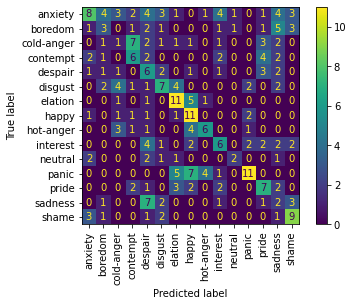

In [627]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_true= y_test, display_labels = emotions, xticks_rotation = 90)